In [29]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import importlib
from time import time
from matplotlib import pyplot as plt

import sys
sys.path.append("../script/")

import Node
import Engine
import BGP
import Functions

# test script

In [142]:
df = pd.read_csv('test_data/simple_line.csv')
df['z'] = df['z'].replace('a',0)
df['z'] = df['z'].replace('b',1)

data = df.to_numpy()
X = data[:,:-1]
y = data[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

In [143]:
df = pd.read_csv('test_data/noise.csv')
df['z'] = df['z'].replace('a',0)
df['z'] = df['z'].replace('b',1)

data = df.to_numpy()
X = data[:,:-1]
y = data[:,-1]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)

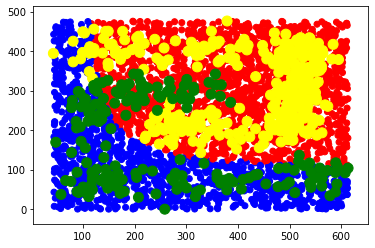

0.0 0.8733509234828496 0.8773006134969326


KeyboardInterrupt: 

In [161]:
importlib.reload(BGP)
importlib.reload(Engine)
importlib.reload(Node)
importlib.reload(Functions)

his_train_acc = []
his_test_acc = []

bgps = []
times = []
num_trees = []
depths = []
nodecounts = []

for _ in range(1):
    seed = np.random.randint(9999999)
    
    np.random.seed(np.random.randint(9999999))
    bgp = BGP.BGP(Functions.simple_opset,X_train,y_train)
    
    train_acc = []
    test_acc = []
    
    boost_num = 10
    parameters = [
        (1, #generation
         100, #population
         100, #population batch
         30, #elites
         2 #bins
         ,1 #p-value
         ,[0,0,0] #beta
        ) for i in range(boost_num)
    ]


    t = time()
    for i in range(boost_num):
        generation,total_size,batch_size,elite_size,bins,p_value,beta = parameters[i]
        bgp.evolve(generation,total_size,batch_size,elite_size,bins,beta,0)
        pure_rate = 1 - bgp.X.shape[0]/bgp.fixed_X.shape[0]
        train_score = accuracy_score(y_train,bgp.predict(X_train))
        test_score = accuracy_score(y_test,bgp.predict(X_test))
        
    
        train_acc.append(train_score)
        test_acc.append(test_score)
        
        num = 3000
        simX = np.transpose([np.random.rand(num) * (max(X[:,0]) - min(X[:,0])) + min(X[:,0]),
                            np.random.rand(num) * (max(X[:,1]) - min(X[:,1])) + min(X[:,1])])
        pred = bgp.predict(simX)
        plt.scatter(simX[:,0],simX[:,1],c=['r' if p == 0 else 'b' for p in pred])
        plt.scatter(X[:,0],X[:,1],c=['yellow' if p == 0 else 'green' for p in y],s=100)
        plt.show()
        
        # print(pure_rate)
        print(pure_rate,train_score,test_score)
        if pure_rate >= 1:
            break
    times.append(time() - t)
    
    d = []
    nc = []
    for t in bgp.trees:
        d.append(t.depth)
        nc.append(t.numNode)
    depths.append(np.average(d))
    nodecounts.append(np.sum(nc))
    num_trees.append(len(bgp.trees))
    bgps.append(bgp)
     
    his_train_acc.append(train_acc)
    his_test_acc.append(test_acc)
    print(train_acc)
    print(test_acc)

In [132]:
print(classification_report(y_train,bgp.predict(X_train),digits=5))
print(classification_report(y_test,bgp.predict(X_test),digits=5))

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000       134
           1    1.00000   1.00000   1.00000       106

    accuracy                        1.00000       240
   macro avg    1.00000   1.00000   1.00000       240
weighted avg    1.00000   1.00000   1.00000       240

              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000        66
           1    1.00000   1.00000   1.00000        37

    accuracy                        1.00000       103
   macro avg    1.00000   1.00000   1.00000       103
weighted avg    1.00000   1.00000   1.00000       103



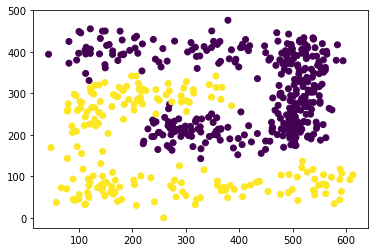

In [153]:
plt.scatter(X[:,0],X[:,1],c=y)

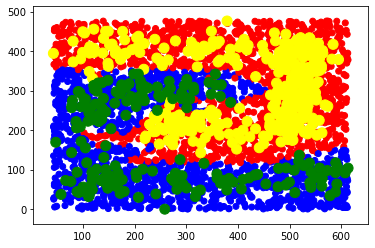

In [154]:
num = 3000
simX = np.transpose([np.random.rand(num) * (max(X[:,0]) - min(X[:,0])) + min(X[:,0]),
                     np.random.rand(num) * (max(X[:,1]) - min(X[:,1])) + min(X[:,1])])
pred = bgp.predict(simX)
plt.scatter(simX[:,0],simX[:,1],c=['r' if p == 0 else 'b' for p in pred])
plt.scatter(X[:,0],X[:,1],c=['yellow' if p == 0 else 'green' for p in y],s=100)
plt.show()

( _multiply -> |1| |1| )


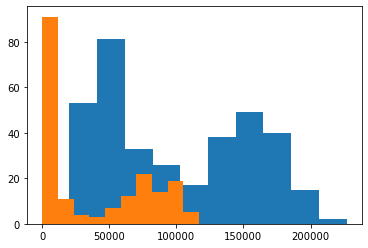

In [155]:
print(bgp.trees[0])
value = bgp.trees[0].predict(X)
plt.hist(value[y==0])
plt.hist(value[y==1])
plt.show()

In [156]:
np.average([i[-1] for i in his_train_acc]),np.average([i[-1] for i in his_test_acc]),np.average(depths),np.average(nodecounts)

(1.0, 0.9815950920245399, 1.0, 24.0)

In [157]:
bgp.trees

[( _multiply -> |1| |1| ),
 ( _multiply -> |1| |0| ),
 ( _multiply -> |1| |1| ),
 ( _divide -> |0| |1| ),
 ( _minus -> |1| |0| ),
 ( _multiply -> |1| |1| ),
 ( _add -> |0| |1| ),
 ( _multiply -> |0| |1| )]

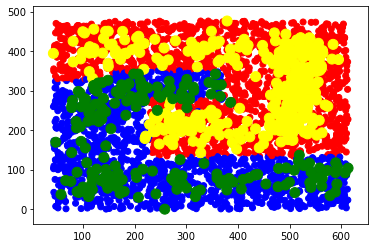

              precision    recall  f1-score   support

         0.0     1.0000    1.0000    1.0000       248
         1.0     1.0000    1.0000    1.0000       131

    accuracy                         1.0000       379
   macro avg     1.0000    1.0000    1.0000       379
weighted avg     1.0000    1.0000    1.0000       379

              precision    recall  f1-score   support

         0.0     0.9720    0.9811    0.9765       106
         1.0     0.9643    0.9474    0.9558        57

    accuracy                         0.9693       163
   macro avg     0.9681    0.9643    0.9661       163
weighted avg     0.9693    0.9693    0.9693       163



(7, 21)

In [159]:
from sklearn.tree import DecisionTreeClassifier

dc = DecisionTreeClassifier()
dc.fit(X_train,y_train)

num = 3000
simX = np.transpose([np.random.rand(num) * (max(X[:,0]) - min(X[:,0])) + min(X[:,0]),
                    np.random.rand(num) * (max(X[:,1]) - min(X[:,1])) + min(X[:,1])])
pred = dc.predict(simX)
plt.scatter(simX[:,0],simX[:,1],c=['r' if p == 0 else 'b' for p in pred])
plt.scatter(X[:,0],X[:,1],c=['yellow' if p == 0 else 'green' for p in y],s=100)
plt.show()

print(classification_report(y_train,dc.predict(X_train),digits=4))
print(classification_report(y_test,dc.predict(X_test),digits=4))
dc.tree_.max_depth,dc.tree_.node_count